In [32]:
import numpy as np
import pandas as pd

# Additional Files

In [33]:
sample_sheet = pd.read_csv('sample_sheet.tsv', sep = '\t')
sample_sheet.drop(['Data Type', 'Data Category','Project ID'],axis=1, inplace=True)
sample_sheet = sample_sheet[sample_sheet['Sample Type'].isin(['Primary Tumor', 'Solid Tissue Normal'])]
sample_sheet

,File ID,File Name,Case ID,Sample ID,Sample Type
0,c568fdc8-6942-44ff-a9d9-3f7a03fdc62a,367864dd-ccd2-473e-9661-6ff4342a4e64.rna_seq.a...,TCGA-73-4658,TCGA-73-4658-01A,Primary Tumor
1,359d07bf-89e3-49fd-8237-723ffb299cfb,dd012e44-f2ef-4bd4-92ac-7403ec383b6d.rna_seq.a...,TCGA-44-2661,TCGA-44-2661-11A,Solid Tissue Normal
2,3f474548-c7b2-4d5e-9f8d-03c800a094fe,3db0576d-969f-4cb6-9e5d-51407b953ef4.rna_seq.a...,TCGA-55-6986,TCGA-55-6986-11A,Solid Tissue Normal
3,4c2a4d47-67dd-4c12-8f3b-1c55eb6fd00e,c6bf25d8-abea-411f-bb80-6e6fefb82757.rna_seq.a...,TCGA-55-8615,TCGA-55-8615-01A,Primary Tumor
4,0e6fc8f1-34ca-4f3b-9d71-5a867e5efb07,4b6c958a-7e20-4b88-b30a-2406b123c8c1.rna_seq.a...,TCGA-97-8177,TCGA-97-8177-01A,Primary Tumor
...,...,...,...,...,...
595,82e982fc-138a-48f8-8127-fb20caa019a2,b1d9364c-d703-4884-b96d-20d8084040a8.rna_seq.a...,TCGA-64-1678,TCGA-64-1678-01A,Primary Tumor
596,d7439e19-2ab4-4209-9628-16e6ae6bc11e,962d56c6-0e10-4b55-9c4d-dbb89c983d74.rna_seq.a...,TCGA-78-7155,TCGA-78-7155-01A,Primary Tumor
597,1098101e-1770-4055-ae41-d6c15e1c7b90,19853c82-c205-4af9-badd-82946eec14ad.rna_seq.a...,TCGA-78-7220,TCGA-78-7220-01A,Primary Tumor
598,1d8df3eb-b059-47f7-b3fa-f4eb3f568423,d5388d2a-976f-4f08-80c2-14bbf4ccc753.rna_seq.a...,TCGA-80-5611,TCGA-80-5611-01A,Primary Tumor


In [34]:
import json

with open('metadata.json', 'r') as file:
    data = json.load(file)
formatted_json = json.dumps(data, indent=4)
#print(formatted_json)


In [35]:
clinical = pd.read_csv('clinical/clinical.tsv', sep = '\t')
clinical.replace('not reported', np.nan, inplace=True)
clinical.replace('Not Reported', np.nan, inplace=True)
clinical.replace("'--", np.nan, inplace=True)

for col in clinical.columns:
    if clinical[col].isna().sum()==clinical.shape[0]:
        clinical.drop(col, axis=1, inplace=True)

clinical['radiation_therapy'] = np.NaN
clinical['pharmaceutical_therapy'] = np.NaN


for i in range(0, clinical.shape[0], 2):
    clinical.loc[i, 'pharmaceutical_therapy'] = clinical.loc[i, 'treatment_or_therapy']
    clinical.loc[i, 'radiation_therapy'] = clinical.loc[i+1, 'treatment_or_therapy']

clinical.drop(['treatment_or_therapy','treatment_type'], axis=1, inplace=True)
clinical = clinical[clinical.index % 2 == 0]

clinical

/var/folders/4q/_57_8q115vs6455tsj4h2ptr0000gn/T/ipykernel_17915/430327362.py:15: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'yes' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

/var/folders/4q/_57_8q115vs6455tsj4h2ptr0000gn/T/ipykernel_17915/430327362.py:16: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'no' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.



,case_id,case_submitter_id,project_id,age_at_index,days_to_birth,days_to_death,ethnicity,gender,race,vital_status,...,morphology,primary_diagnosis,prior_malignancy,prior_treatment,site_of_resection_or_biopsy,synchronous_malignancy,tissue_or_organ_of_origin,year_of_diagnosis,radiation_therapy,pharmaceutical_therapy
0,0075437e-ba1a-46be-86d6-9773209a2b5e,TCGA-62-A471,TCGA-LUAD,64,-23689,NaN,not hispanic or latino,male,white,Alive,...,8140/3,"Adenocarcinoma, NOS",no,No,"Upper lobe, lung",No,"Upper lobe, lung",2010,no,yes
2,009be09b-f9f6-43b7-8f45-4a648f8123ce,TCGA-67-3773,TCGA-LUAD,84,-30706,NaN,not hispanic or latino,female,white,Alive,...,8140/3,"Adenocarcinoma, NOS",no,No,"Lower lobe, lung",No,"Lower lobe, lung",2009,NaN,NaN
4,01e9888d-b5b9-48f1-8ba6-8a89af108a04,TCGA-NJ-A7XG,TCGA-LUAD,49,-18127,NaN,not hispanic or latino,male,black or african american,Alive,...,8140/3,"Adenocarcinoma, NOS",no,No,"Upper lobe, lung",No,"Upper lobe, lung",2013,yes,no
6,0232d299-4cdf-4fd7-9a5e-8d13c208b40c,TCGA-91-6848,TCGA-LUAD,59,-21829,NaN,not hispanic or latino,male,white,Alive,...,8140/3,"Adenocarcinoma, NOS",no,No,"Upper lobe, lung",No,"Upper lobe, lung",2009,no,yes
8,028e99e9-5b9a-4954-bb6e-6d4709a3cea8,TCGA-55-6986,TCGA-LUAD,74,NaN,NaN,NaN,female,white,Alive,...,8252/3,"Bronchiolo-alveolar carcinoma, non-mucinous",no,No,"Lower lobe, lung",No,"Lower lobe, lung",2004,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1024,fe3eeeb6-0db4-46d7-a020-55604d474c12,TCGA-78-7167,TCGA-LUAD,77,-28295,2681,NaN,male,white,Dead,...,8260/3,"Papillary adenocarcinoma, NOS",no,No,"Lung, NOS",No,"Lung, NOS",2002,no,no
1026,fe714ac0-f874-426a-924b-a2980232b5f7,TCGA-55-8616,TCGA-LUAD,58,-21225,NaN,not hispanic or latino,female,white,Alive,...,8140/3,"Adenocarcinoma, NOS",no,No,"Upper lobe, lung",No,"Upper lobe, lung",2012,NaN,NaN
1028,ff07ea4b-4e50-410d-99d6-96a351dad7b1,TCGA-55-7570,TCGA-LUAD,60,-22218,NaN,not hispanic or latino,male,black or african american,Alive,...,8140/3,"Adenocarcinoma, NOS",no,No,"Upper lobe, lung",No,"Upper lobe, lung",2011,no,no
1030,ff9def3d-17e5-4ef6-b74e-933f11ed6f00,TCGA-78-7146,TCGA-LUAD,71,-26272,173,NaN,female,white,Dead,...,8255/3,Adenocarcinoma with mixed subtypes,no,No,"Lower lobe, lung",No,"Lower lobe, lung",1999,no,no


In [36]:
exposure = pd.read_csv('clinical/exposure.tsv', sep = '\t')
exposure.replace('not reported', np.nan, inplace=True)
exposure.replace('Not Reported', np.nan, inplace=True)
exposure.replace("'--", np.nan, inplace=True)

for col in exposure.columns:
    if exposure[col].isna().sum()==exposure.shape[0]:
        exposure.drop(col, axis=1, inplace=True)
exposure

,case_id,case_submitter_id,project_id,cigarettes_per_day,pack_years_smoked,years_smoked
0,0075437e-ba1a-46be-86d6-9773209a2b5e,TCGA-62-A471,TCGA-LUAD,1.643835616438356,30.0,NaN
1,009be09b-f9f6-43b7-8f45-4a648f8123ce,TCGA-67-3773,TCGA-LUAD,NaN,NaN,NaN
2,01e9888d-b5b9-48f1-8ba6-8a89af108a04,TCGA-NJ-A7XG,TCGA-LUAD,NaN,NaN,NaN
3,0232d299-4cdf-4fd7-9a5e-8d13c208b40c,TCGA-91-6848,TCGA-LUAD,NaN,NaN,NaN
4,028e99e9-5b9a-4954-bb6e-6d4709a3cea8,TCGA-55-6986,TCGA-LUAD,NaN,NaN,NaN
...,...,...,...,...,...,...
512,fe3eeeb6-0db4-46d7-a020-55604d474c12,TCGA-78-7167,TCGA-LUAD,3.506849315068493,64.0,NaN
513,fe714ac0-f874-426a-924b-a2980232b5f7,TCGA-55-8616,TCGA-LUAD,NaN,NaN,NaN
514,ff07ea4b-4e50-410d-99d6-96a351dad7b1,TCGA-55-7570,TCGA-LUAD,NaN,NaN,NaN
515,ff9def3d-17e5-4ef6-b74e-933f11ed6f00,TCGA-78-7146,TCGA-LUAD,0.3287671232876712,6.0,10.0


## Bias Discovery

### Age & Sex

In [37]:
import plotly.express as px

age = clinical['age_at_index'].str.extract(r'(\d+)')
age = age.astype(float)

fig = px.histogram(age, x=0, nbins=20, title='Age Distribution')
fig.show()


The patient's ages are distributed along a normal distribution, this suggests the dataset is quite balanced in that regard.

In [38]:
fig = px.pie(clinical['gender'].value_counts(), values=clinical['gender'].value_counts().values, names=clinical['gender'].value_counts().index, title='Gender Distribution')
fig.show()

Here, we have a slightly higher proportion of females, but the dataset remains balanced.

### Race distribution

In [39]:
fig = px.pie(clinical['race'].value_counts(), values=clinical['race'].value_counts().values, names=clinical['race'].value_counts
().index, title='Race Distribution')
fig.show()

Here however, the dataset is highly imbalanced and biological results will be biased as the patients are mostly white.

### Tumor vs Normal 

In [40]:
fig = px.pie(sample_sheet['Sample Type'].value_counts(), values=sample_sheet['Sample Type'].value_counts().values, names=sample_sheet['Sample Type'].value_counts().index, title='Sample Type Distribution')
fig.show()


Here again, we see that the dataset is highly unbalanced, Normal Tissue only accounts dor 10% of all cases. This elevated class imbalance could lead to misleading accuracy.

### Treatment & Exposure

In [41]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

radiation_therapy_counts = clinical['radiation_therapy'].value_counts(dropna=False)
pharmaceutical_therapy_counts = clinical['pharmaceutical_therapy'].value_counts(dropna=False)

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]],
                    subplot_titles=('Radiation Therapy Distribution', 'Pharmaceutical Therapy Distribution'))

fig.add_trace(go.Pie(labels=radiation_therapy_counts.index, values=radiation_therapy_counts.values, name='Radiation Therapy'), 1, 1)
fig.add_trace(go.Pie(labels=pharmaceutical_therapy_counts.index, values=pharmaceutical_therapy_counts.values, name='Pharmaceutical Therapy'), 1, 2)

# Update layout for better presentation
fig.update_layout(title_text='Therapy Distributions', height=500, width=800)

# Show the figure
fig.show()

In [42]:
fig = px.pie(exposure['pack_years_smoked'].isna(), names=['Not NaN', 'NaN'], title='Percentage of NaN in cigarettes_per_day')
fig.show()


The high proportion of missing values regarding the patient's exposure to cigarettes makes it hard to use this feature in a meaningful way.

# Load RNA

In [ ]:
# Run the following to create the rna1.csv file
#from build_rna_dataset import generate_rna_dataset
#generate_rna_dataset()

In [44]:
rna = pd.read_csv('rna1.csv')
rna

,case_id,ENSG00000000003.15,ENSG00000000005.6,ENSG00000000419.13,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,ENSG00000001084.13,...,ENSG00000288661.1,ENSG00000288662.1,ENSG00000288663.1,ENSG00000288665.1,ENSG00000288667.1,ENSG00000288669.1,ENSG00000288670.1,ENSG00000288671.1,ENSG00000288674.1,ENSG00000288675.1
0,32dd8db9-1e43-497e-a35a-664d7d15ed60.rna_seq.a...,42.3420,0.0358,78.6861,5.9465,2.0196,18.3097,137.0133,48.9458,39.4429,...,0.0,0.0000,0.1949,0.0,0.0,0.0000,5.6773,0.0,0.0495,0.8184
1,b8e8f06f-a5a9-4d16-b39f-585dcee31087.rna_seq.a...,64.0571,0.1021,86.0001,11.8446,3.1504,13.5074,36.2555,61.2118,78.3831,...,0.0,0.0000,0.1058,0.0,0.0,0.0000,9.0318,0.0,0.0744,0.4487
2,ef19e097-8ae9-4362-b77a-76d8f5399760.rna_seq.a...,36.6403,0.0000,129.5101,6.4947,1.4976,10.2404,11.9113,60.5953,3.9204,...,0.0,0.0000,0.3468,0.0,0.0,0.0000,8.9059,0.0,0.0685,0.8963
3,7edd63ce-c5bb-4209-b8c8-98af0fae03ed.rna_seq.a...,51.3865,0.0000,129.0357,9.6502,10.3615,2.5544,13.5731,63.6807,434.9901,...,0.0,0.0000,0.6721,0.0,0.0,0.0000,8.0733,0.0,0.0085,0.4366
4,a6a841ae-f63f-45ab-9a17-2288e12a9577.rna_seq.a...,22.4382,0.0000,71.1426,11.4217,3.6057,67.0726,38.8054,87.0983,28.3442,...,0.0,0.0000,0.2669,0.0,0.0,0.0000,8.6754,0.0,0.0608,0.9053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,aa85d7ef-5884-4eb4-a78b-3023d2e01a8b.rna_seq.a...,12.6914,0.0712,61.7081,6.0897,1.6189,115.4886,33.4770,53.3821,4.6809,...,0.0,3.5017,0.2396,0.0,0.0,0.0000,4.8253,0.0,0.0983,0.6878
596,c8e5ea6c-c6b1-4807-8d9f-b2e96154a1eb.rna_seq.a...,27.9056,0.0000,102.5467,5.6394,1.4884,17.1235,30.2006,32.7295,8.7458,...,0.0,0.0000,0.1504,0.0,0.0,0.0000,9.5326,0.0,0.0486,0.6959
597,c16f63fb-a468-48e8-b679-6e26b8457530.rna_seq.a...,48.0825,1.1000,108.9568,10.8978,3.8437,13.3459,45.0184,33.9447,9.4449,...,0.0,0.0000,0.3799,0.0,0.0,0.0000,20.2462,0.0,0.0113,0.2577
598,64a2d5cb-2892-4d2a-aa7a-cc1a6dec1c46.rna_seq.a...,29.6621,0.0421,121.0494,7.0065,9.9934,13.6715,93.1732,79.2578,111.9764,...,0.0,0.0000,0.5561,0.0,0.0,0.0156,7.3599,0.0,0.0711,0.7028


In [45]:
#Add the output
output = sample_sheet[['File Name', 'Sample Type']]
rna = pd.merge(rna, output, left_on='case_id', right_on='File Name')
rna.drop('File Name', axis=1, inplace=True)

rna = rna[rna['Sample Type'].isin(['Primary Tumor', 'Solid Tissue Normal'])]   #Drop Recurrent Tumor because only 2 occurences
rna['Sample Type'].replace({'Primary Tumor': 1, 'Solid Tissue Normal': 0}, inplace=True)

In [46]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

rna.iloc[:, 1:-1] = scaler.fit_transform(rna.iloc[:, 1:-1])

# Handling Outliers (Clipping)

In [47]:
def count_outliers(df, threshold):
    float_df = df.select_dtypes(include=['float64'])
    outliers_count = (float_df.abs() > threshold).sum()
    return outliers_count

# Define the threshold
threshold = 4  #We choose 4 to be quite permissive

# Count the outliers
outliers_count = count_outliers(rna, threshold)
outliers_count.mean()

5.335822617870096

In [48]:
#Clip the outliers

from tqdm import tqdm

def ClipOutliers(df, threshold):
    float_df = df.select_dtypes(include=['float64'])
    for col in tqdm(float_df.columns):
        df[col] = float_df[col].clip(lower=-threshold, upper=threshold)
    return df

rna = ClipOutliers(rna, threshold)

100%|██████████| 60660/60660 [04:41<00:00, 215.55it/s]


In [ ]:
#Save the new file 

rna.to_csv('rna2.csv', index=False)

# Feature Selection

## Mutual Information

We choose to use Mutual Information to estimate the pertinence of a feature.

In [ ]:
#Load clipped file
rna = pd.read_csv('rna2.csv')

In [52]:
ids = rna['case_id']
rna.drop('case_id', axis=1, inplace=True)

X = rna.iloc[:, :-1]
y = rna.iloc[:, -1]


In [53]:
from tqdm import tqdm
from sklearn.feature_selection import mutual_info_classif

# Get the Mutual Information Scores for each feature
def GetMiScores(X, y, batch_size=100):
    n_features = X.shape[1]
    mi_scores = []

    #Tqdm to show the progress
    for i in tqdm(range(0, n_features, batch_size)):
        end = min(i + batch_size, n_features)
        mi_scores.extend(mutual_info_classif(X.iloc[:, i:end], y))
    mi = pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores})
    mi = mi.sort_values(by='MI Score', ascending=False)
    return mi

mi = GetMiScores(X, y)

100%|██████████| 607/607 [04:46<00:00,  2.12it/s]


In [54]:
#We can observe the number of features selected for different thresholds

n_features = {}
for threshold in np.arange(0,0.3,0.01):
    n_features[threshold] = len(mi[mi['MI Score']>threshold])

fig = px.line(x=list(n_features.keys()), y=list(n_features.values()), title='Number of features selected for different thresholds')
fig.show()


# Handling Unbalanced data

In [55]:
fig = px.pie(rna, names='Sample Type', title='Imbalanced Class')
fig.show()


## Using SMOTE

In [56]:
#We will use SMOTE to balance the classes
#Example :

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

smote = SMOTE(sampling_strategy='minority')  #Minority class will be oversampled

#Suppose that we split the data into X_train, y_train, X_test, y_test
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

print('Before SMOTE :')
print(ytrain.value_counts())

Xtrain, ytrain = smote.fit_resample(Xtrain, ytrain)

print('After SMOTE :')
print(ytrain.value_counts())

Before SMOTE :
Sample Type
1    433
0     45
Name: count, dtype: int64
After SMOTE :
Sample Type
1    433
0    433
Name: count, dtype: int64


# First Model : Logistic Regression

In [57]:
#As a first test, we can use Logistic Regression, a very common model for binary classification

#First, we define a function to test a model
#Considering the very low number of samples, we will use cross-validation
#And we also use SMOTE to balance the classes

#Considering unbalanced classes, we will use auc-roc as a metric

from sklearn.model_selection import cross_val_predict
from imblearn.pipeline import Pipeline
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import seaborn as sns

def EvaluateModel(model, X, y, details = True):
    smote = SMOTE(sampling_strategy='minority')
    pipeline = Pipeline([('smote', smote), ('model', model)])
    ypred = cross_val_predict(pipeline, X, y, cv=5, method='predict_proba')

    if details:
        #Classification report
        print(classification_report(y, ypred.argmax(axis=1)))

        #Confusion matrix
        cm = confusion_matrix(y, ypred.argmax(axis=1))
        sns.heatmap(cm, annot=True)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.title('Confusion matrix')
        plt.show()

    
    return roc_auc_score(y, ypred[:, 1])
    

In [58]:
#We use the feature selection rop reduce the dimensionality

#We create a function to do that by selecting the k best features

def SelectKbest(k,mi):
    return mi.iloc[:k, 0]



#For now we will choose 100 features to test the model

k = 100
features = SelectKbest(k, mi)

data = rna[features]

X = data
y = rna.iloc[:, -1]

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        59
           1       1.00      1.00      1.00       539

    accuracy                           0.99       598
   macro avg       0.98      0.98      0.98       598
weighted avg       0.99      0.99      0.99       598



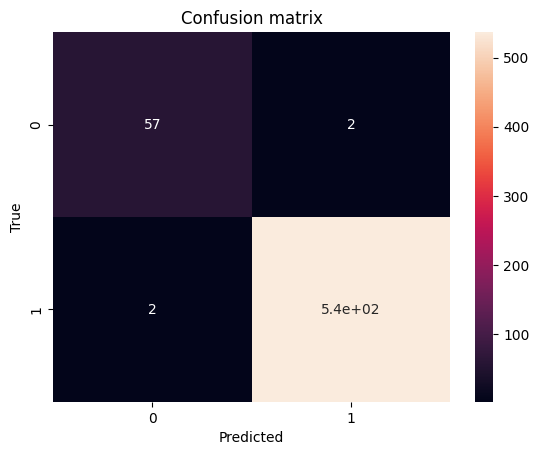

AUC-ROC score : 0.9994025345114934


In [59]:
#Test with Logistic Regression
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
score = EvaluateModel(model, X, y)
print('AUC-ROC score :', score)

In [60]:
#Very good results
#We can observe the feature importance :

model.fit(X, y)

importance = model.coef_[0]

importance = pd.DataFrame({'Feature': features, 'Importance': importance})

importance = importance.sort_values(by='Importance', ascending=False)

importance

,Feature,Importance
54330,ENSG00000277494.2,0.432447
6454,ENSG00000131471.7,0.190131
7805,ENSG00000139304.16,0.186847
32816,ENSG00000235387.5,0.173417
15142,ENSG00000182010.11,0.165883
...,...,...
11139,ENSG00000163815.6,-0.330447
6820,ENSG00000134020.8,-0.334401
4335,ENSG00000114854.8,-0.367114
38600,ENSG00000249751.4,-0.392385


# Feature Selection Variation

In [ ]:
#To see if it changes the performance of the moel, we can try different k for the feature selection

auc_by_k = {}

for k in range(50, 2500, 50):
    features = SelectKbest(k, mi)
    data = rna[features]
    X = data
    y = rna.iloc[:, -1]
    print(r'Processing k =', k)   #To show the progress
    score = EvaluateModel(model, X, y, details=False)

    auc_by_k[k] = score
    

In [62]:
#Show results

fig = px.line(x=list(auc_by_k.keys()), y=list(auc_by_k.values()), title='AUC-ROC score by number of features')
fig.show()

In [63]:
#We can see that the performance is till very high, no matter the number of features selected
#We can maybe try with even less features

In [64]:
auc_by_k = {}

for k in range(1, 20, 1):
    features = SelectKbest(k, mi)
    data = rna[features]
    X = data
    y = rna.iloc[:, -1]
    score = EvaluateModel(model, X, y, details=False)

    auc_by_k[k] = score


fig = px.line(x=list(auc_by_k.keys()), y=list(auc_by_k.values()), title='AUC-ROC score by number of features')
fig.show()

In [65]:
#Even with just a few features, the performance is still very good

## With 2 Features

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        59
           1       1.00      0.99      1.00       539

    accuracy                           0.99       598
   macro avg       0.98      1.00      0.99       598
weighted avg       1.00      0.99      1.00       598



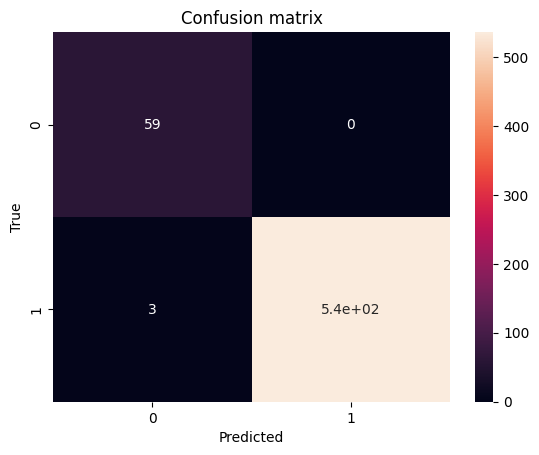

AUC-ROC score : 0.99943398006352


In [66]:
#Test with 2 features

features = SelectKbest(2, mi)

data = rna[features]

X = data
y = rna.iloc[:, -1]

model = LogisticRegression()
score = EvaluateModel(model, X, y)
print('AUC-ROC score :', score)


In [67]:
#Feature importance

model.fit(X, y)
importance = model.coef_[0]
importance = pd.DataFrame({'Feature': features, 'Importance': importance})
importance = importance.sort_values(by='Importance', ascending=False)
importance

,Feature,Importance
4335,ENSG00000114854.8,-2.005116
7114,ENSG00000135604.10,-2.145849


In [68]:
#If the results are really reliable, we have a very interpretable model
#We can even suppose an easy correlation/causation realtion with only 2 features
# Hypothesis : These only 2 features cause the cancer ?

# Problem : High risk of overfitting considering the very low number of samples (and the enromous number of initial features)

# We can try to remove the best features to see if the performance decreases

# First we select the best 1000 features

features = SelectKbest(1000, mi)
data = rna[features]
X = data
y = rna.iloc[:, -1]

#Still LR
model = LogisticRegression()

In [ ]:
#So we train a model, see the performence, and remove the best feature from the feature importance
# And we'll see if the performance decreases

scores_by_iteration = []

for i in range(100):
    #To follow progress
    print('Iteration :', i)
    
    #Evaluate the model
    score = EvaluateModel(model, X, y, details=False)
    scores_by_iteration.append(score)

    #Get the feature importance
    model.fit(X, y)
    importance = model.coef_[0]
    importance = pd.DataFrame({'Feature': features, 'Importance': importance})
    importance = importance.sort_values(by='Importance', ascending=False)

    #Remove the best feature
    features = importance.iloc[1:, 0]
    data = rna[features]
    X = data
    y = rna.iloc[:, -1]


In [70]:
#Observe the results

fig = px.line(y=scores_by_iteration, title='AUC-ROC score by iteration')
fig.show()

In [71]:
# Our hypothesis is obviously rejected
# Even when removing the 'best' features, the model still find some other features to predict the target

#We can verify this again but by removing more features


#Starting with 10k features

features = SelectKbest(10000, mi)
data = rna[features]
X = data
y = rna.iloc[:, -1]

model = LogisticRegression()

In [ ]:
scores_by_features_removed = {}

for i in range(100):
    #To follow progress
    print('Iteration :', i)
    
    #Evaluate the model
    score = EvaluateModel(model, X, y, details=False)
    scores_by_features_removed[i] = score

    #Get the feature importance
    model.fit(X, y)
    importance = model.coef_[0]
    importance = pd.DataFrame({'Feature': features, 'Importance': importance})
    importance = importance.sort_values(by='Importance', ascending=False)

    #Remove the best 50 features
    features = importance.iloc[50:, 0]
    data = rna[features]
    X = data
    y = rna.iloc[:, -1]



In [ ]:
#Results

fig = px.line(y=list(scores_by_features_removed.values()), title='AUC-ROC score by number of features removed')
fig.show()

In [ ]:
#Results drop a very little bit
# But it's still very high, even by removing the best features 50 by 50, and doing it 100 times